In [175]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn
seaborn.set(style='ticks', rc={'figure.figsize': (12,8)})

# Loading in the data and converting the data to a dataframe 

In [176]:
input_csv = "input.csv"

In [177]:
# creating a dataframe
df = pd.read_csv(input_csv)

# Cleaning the data

In [178]:
# extracting relevant columns
relevant_columns = ['Country', 'Region', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita) dollars']
df = df[relevant_columns]


In [179]:
# renaming columns 
df.rename(columns={'Pop. Density (per sq. mi.)':'Population_density',
                          'Infant mortality (per 1000 births)':'Infant_mortality',
                          'GDP ($ per capita) dollars':'GDP_per_cap_dollars'}, 
                 inplace=True)

In [180]:
# cleaning the GDP_per_cap_dollars column to prepare it to convert from oject to float
df.iloc[:, 4] = df.iloc[:, 4].str.strip(' dollars')

In [181]:
# replacing al the cells with value 'unknown' to NaN
df.replace('unknown', np.nan, inplace=True)

In [182]:
# converts GDP_per_cap_column from object to float to be able to do calculations
df["GDP_per_cap_dollars"] = df.GDP_per_cap_dollars.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
Country                227 non-null object
Region                 227 non-null object
Population_density     222 non-null object
Infant_mortality       224 non-null object
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(1), object(4)
memory usage: 8.9+ KB
None


In [183]:
# cleaning the Infant_mortality column to prepare it to convert from oject to float
df['Infant_mortality'] = df['Infant_mortality'].str.replace(',', '.')

In [184]:
df["Infant_mortality"] = df.Infant_mortality.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
Country                227 non-null object
Region                 227 non-null object
Population_density     222 non-null object
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(2), object(3)
memory usage: 8.9+ KB
None


In [185]:
df['Population_density'] = df['Population_density'].str.replace(',', '.')

In [186]:
df["Population_density"] = df.Population_density.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
Country                227 non-null object
Region                 227 non-null object
Population_density     222 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(3), object(2)
memory usage: 8.9+ KB
None


In [187]:
# replacing missing values with value 0 to NaN's so they do not influence calculations
df['Population_density'] = df['Population_density'].replace(0, np.nan)

In [188]:
# dropping a row because of two or more missing columns
df = df.drop(df.index[223])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     220 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    222 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


In [189]:
# replacing GDP of Surinam with NaN
df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].replace(400000, np.nan)

After manually nspecting the dataframe, Surinam appears to be an outlier.
This number of 400000 is clearly an error, since the real GDP per capita is 5900.56 USD (source World Bank).

In [190]:
# there are four rows with one missing value (GDP), for this rows, the missing value will be replaced by the mean
df['GDP_per_cap_dollars'] = df['GDP_per_cap_dollars'].fillna(df['GDP_per_cap_dollars'].mean())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     220 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    226 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


In [191]:
# there are six rows with one missing column (population density), for this rows, the missing value will be replaced by the mean
df['Population_density'] = df['Population_density'].fillna(df['Population_density'].mean())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     226 non-null float64
Infant_mortality       224 non-null float64
GDP_per_cap_dollars    226 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


In [192]:
# there are two rows with one missing column (Infant_mortality), for this rows, the missing value will be replaced by the mean
df['Infant_mortality'] = df['Infant_mortality'].fillna(df['Infant_mortality'].mean())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 5 columns):
Country                226 non-null object
Region                 226 non-null object
Population_density     226 non-null float64
Infant_mortality       226 non-null float64
GDP_per_cap_dollars    226 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.6+ KB
None


# Descriptive statistiscs and visualization for GDP per capita

In [193]:
# mean
df['GDP_per_cap_dollars'].mean()

9759.27601809955

In [194]:
# median
df['GDP_per_cap_dollars'].median()

5800.0

In [195]:
# mode
df['GDP_per_cap_dollars'].mode()

0    800.0
dtype: float64

In [196]:
# standard deviation 
df['GDP_per_cap_dollars'].std()

10011.365426723303

Text(0.5, 1.0, 'Histogram of GDP')

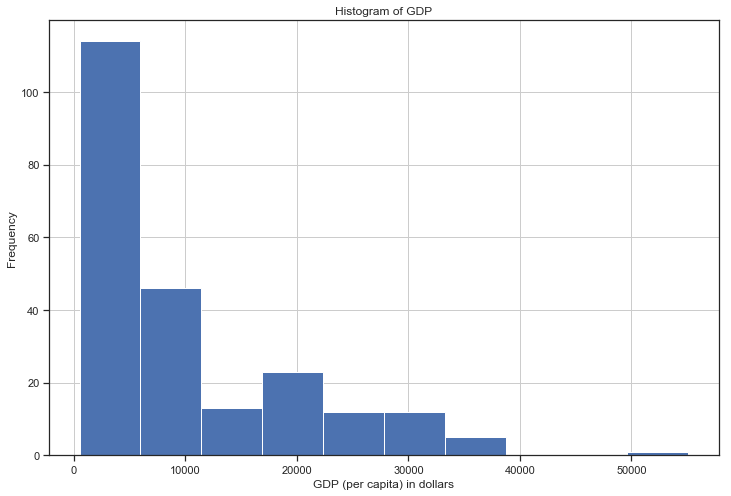

In [197]:
# drawing the histogram for GDP column
histogram_gdp = df['GDP_per_cap_dollars'].plot(kind='hist', grid=True)

# set the x-axis label
histogram_gdp.set_xlabel("GDP (per capita) in dollars")

# set title
histogram_gdp.set_title("Histogram of GDP")

Text(0.5, 1.0, 'Boxplot of GDP')

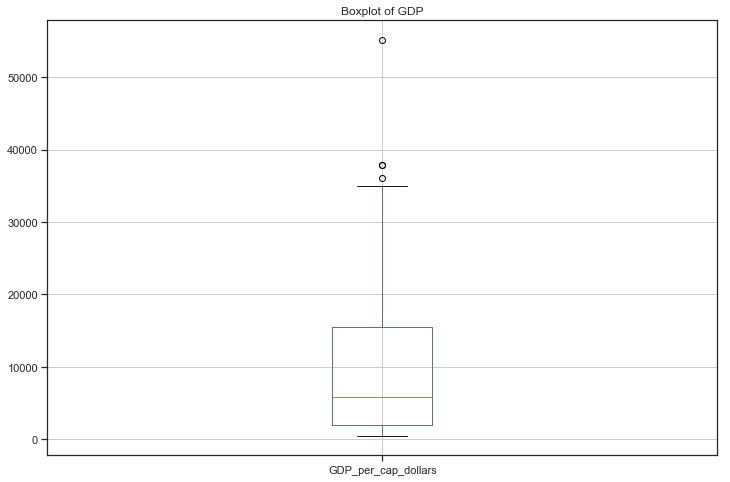

In [198]:
# drawing the boxplot for GDP column
ax_box_gdp = df['GDP_per_cap_dollars'].plot(kind='box', grid=True)

# set title
ax_box_gdp.set_title("Boxplot of GDP")

The histogram and boxplot both show that this data is skewed to the right. This can also be seen in the descriptive statistics, because the mean is greater than the median. The boxplot also shows three outliers, but after manual inspection, the data entries do not seem erroneous (Bermuda, Norway and USA).

# Five number summary and visualization for infant mortality

In [199]:
# maximum
df['Infant_mortality'].max()

191.19

In [200]:
# minimum
df['Infant_mortality'].min()

2.29

In [201]:
# median
df['Infant_mortality'].median()

21.04

In [202]:
# first quantile
df['Infant_mortality'].quantile(0.25)

8.2025

In [203]:
# third quantile
df['Infant_mortality'].quantile(0.75)

55.4225

Text(0.5, 1.0, 'Boxplot of Infant Mortality')

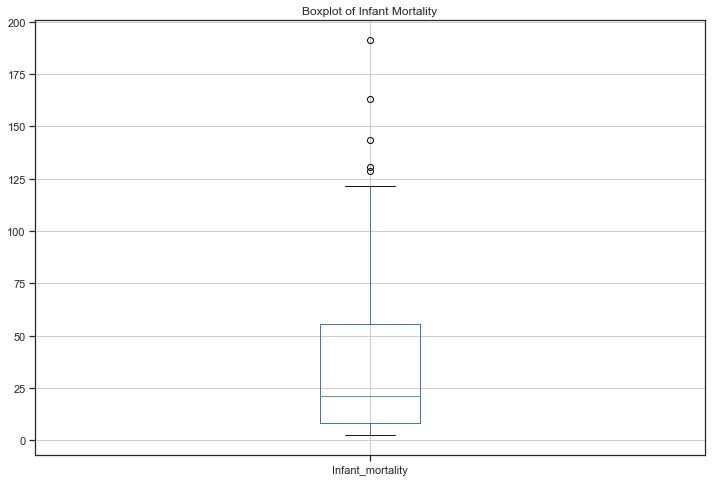

In [204]:
# drawing the boxplot for Infant mortality column
ax_box_im = df['Infant_mortality'].plot(kind='box', grid=True)

# set title
ax_box_im.set_title("Boxplot of Infant Mortality")

This boxplot shows five outliers. After manual checking, those inputs do not seem to be erroneous, because all those outliers are countries in dangerous and/or developing countries: Afghanistan, Angola, Liberia, Mozambique and Sierra Leone. For this reason, this data will not be removed/replaced.

# Bonus: scatterplot incorporating both the GDP and Infant Mortality Data

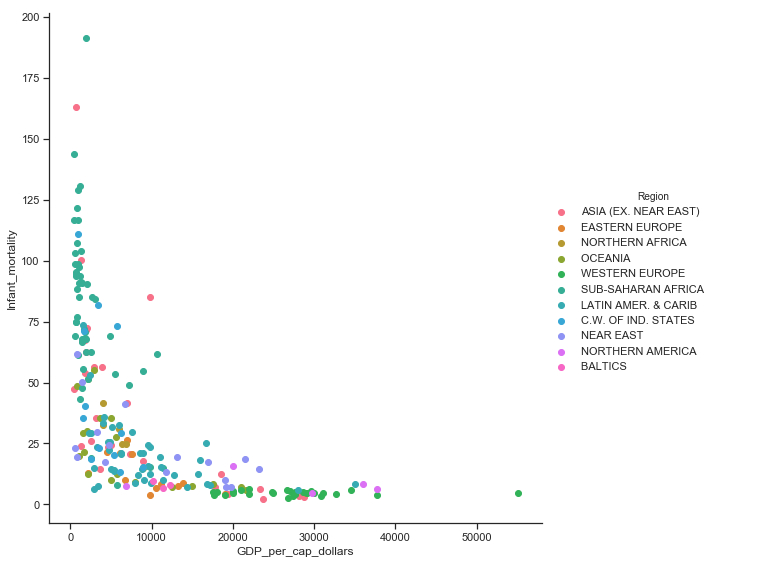

In [205]:
# using seaborn library to visualize countries colored by their region
fg = seaborn.FacetGrid(data=df, hue='Region', height=8)
fg.map(plt.scatter, 'GDP_per_cap_dollars', 'Infant_mortality').add_legend()

Analysis: there appears to be a negative connection between GDP per capita and infant mortality. The scatterplot also shows that countries of the same region cluster together on the scatterplot. For example, most western european countries cluster together on the low-right part of the scatterplot, indicating that countries of this region have a relatively high GDP per capita and low infant mortality.

# From dataframe to .json

In [ ]:
# reset the index of dataframe to achieve necessary structure (with country as index)
df.set_index('Country', inplace=True)

In [ ]:
# convert dataframe to json structure and write to a json file
df_json = df.to_json('data2.json', orient='index')